In [1]:
import matplotlib.pyplot as plt

# Classic models of drift and selection

- Single locus models of two alleles
- Haploids and diploids

# Haploids

- There are two alleles, $A_1$ and $A_2$.
- The frequency of $A_1$ is $p_1$.
- The frequency of $A_2$ is $p_2 = 1 - p_1$.
- $\sum_i p_i = 1$
- The fitness of $A_i$ is $w_i$.

# Population mean fitness

The mean fitness, $\bar w$, is the weighted average of fitnesses:

$$
\bar w = p_1w_1 + (1-p_1)w_2
$$

# Fitness

- We usually mean relative fitness.
- Relative fitness is why $\bar w$ is important.
- The frequency of $A_i$ in the next generation is $p_i\frac{w_i}{\bar w}$.

# Basic recursions

Let $p'_2$ be the frequency of $A_2$ one generation in the future:

$$
p'_2 = p_2\frac{w_2}{\bar w}.
$$

Then,

$$
\begin{align}
\Delta p_2 & = p'_2 - p_2 \\
 & = p_2\frac{w_2}{\bar w} - p_2 \\
 & = \frac{p_1p_2(w_2 - w_1)}{\bar w}.
\end{align}
$$

# Infinite populations

- Infinite means *no stochasticity*.
- $p_i$ changes deterministically according to $\Delta p_i$.

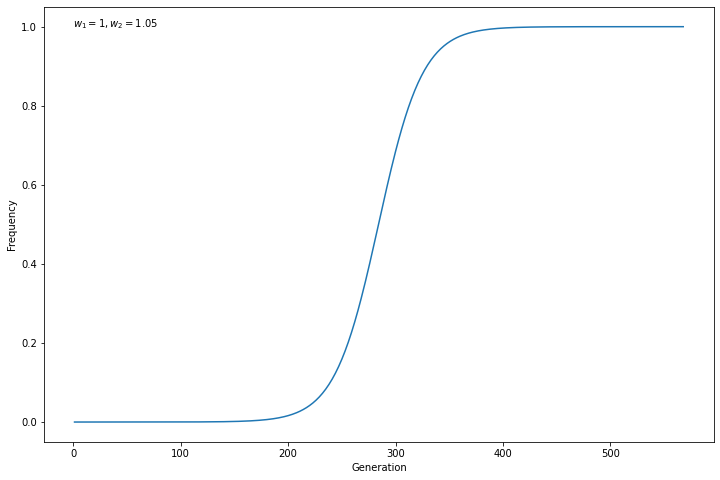

In [2]:
p = [1e-6]
w1 = 1.0
w2 = 1.05
while p[-1] <= 1 - 1e-6:
    dp = p[-1] * (1 - p[-1]) * (w2 - w1) / ((1 - p[-1]) * w1 + p[-1] * w2)
    p.append(p[-1] + dp)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
ax.plot([i + 1 for i in range(len(p))], p)
ax.set_xlabel("Generation")
ax.set_ylabel("Frequency")
ax.text(0, 1, r"$w_1=1,w_2=1.05$");

# Finite populations

- A haploid population of $N$ individuals.
- $N$ is constant over time.
- $E[p'_2] = p_2 + \Delta p_2$.
- Therefore, the *number* of copies of $A_2$ in the next generation is a binomial random variable with mean $N(p_2 + \Delta p_2)$ and variance $p_2(1 - p_2)/N$.
- This random sampling of alleles each generation is "genetic drift".


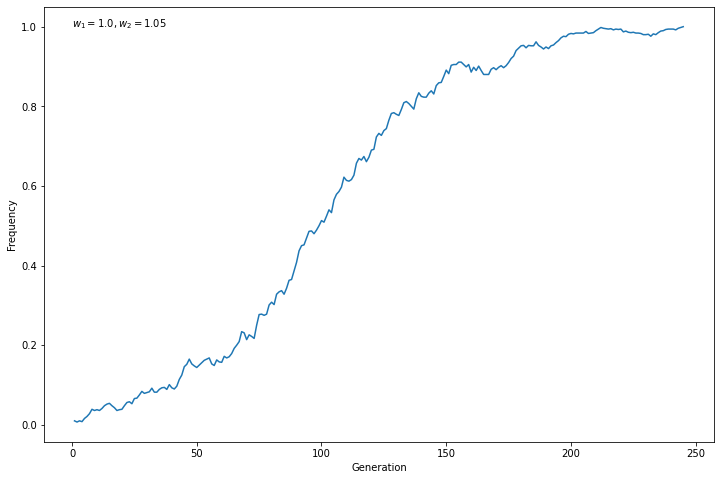

In [3]:
import numpy as np

np.random.seed(12455)


def haploid_trajectory(p2, w1, w2, N):
    freqs = [p2]
    while freqs[-1] > 0.0 and freqs[-1] < 1.0:
        wbar = (1 - freqs[-1]) * w1 + freqs[-1] * w2
        ep2prime = freqs[-1] + freqs[-1] * (1 - freqs[-1]) * (w2 - w1) / (wbar)
        p2prime = np.random.binomial(N, ep2prime) / N
        freqs.append(p2prime)
    return freqs


freqs = haploid_trajectory(0.01, 1.0, 1.05, 1000)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
ax.plot([i + 1 for i in range(len(freqs))], freqs)
ax.set_xlabel("Generation")
ax.set_ylabel("Frequency")
ax.text(0, 1.0, r"$w_1=1.0,w_2=1.05$");

# Drift in a haploid population

- $w_1 = w_2$

In [4]:
%%html
<iframe width="100%" height="710" frameborder="0"
  src="https://observablehq.com/embed/@molpopgen/genetic-drift-in-a-haploid-population?cells=traj_plot%2Cviewof+N%2Cviewof+num_generations%2Cviewof+num_copies%2Cviewof+num_replicates"></iframe>

# Selection in a haploid population

- $w_2 \neq w_1$

In [5]:
%%html
<iframe width="100%" height="750" frameborder="0"
  src="https://observablehq.com/embed/@molpopgen/genetic-drift-and-selection-in-a-haploid-population?cells=traj_plot%2Cviewof+N%2Cviewof+num_generations%2Cviewof+mutant_fitness%2Cviewof+num_copies%2Cviewof+num_replicates"></iframe>

# Diploids

We have the following model:

Genotype|AA|Aa |aa 
---:|:----:|:------|:-----
Fitness|w11|w12|w22
Frequency at birth|p1**2|2p1(1-p1)|p2**2

# Deterministic dynamics in diploids

In [6]:
%%html
<iframe width="100%" height="520" frameborder="0"
  src="https://observablehq.com/embed/@molpopgen/deterministic-dynamics-in-diplioid-populations?cells=traj_plot%2Cviewof+w22"></iframe>

# Allele frequency dynamics in a finite diploid population

In [7]:
%%html
<iframe width="100%" height="764" frameborder="0"
  src="https://observablehq.com/embed/@molpopgen/genetic-drift-and-selection-in-a-diploid-population?cells=traj_plot%2Cviewof+N%2Cviewof+num_generations%2Cviewof+num_copies%2Cviewof+wAa%2Cviewof+waa%2Cviewof+num_replicates"></iframe>

# Dynamics during fixation in finite diploid populations

- $w_{11} < w_{12} \leq w_{22}$

In [8]:
%%html
<iframe width="100%" height="704" frameborder="0"
  src="https://observablehq.com/embed/@molpopgen/fixation-under-directional-selection?cells=detail_plot%2Cviewof+N%2Cviewof+num_copies%2Cviewof+selection_coefficient%2Cviewof+dominance%2Cviewof+show_genotypes"></iframe>